In [2]:
import os
import sys
from os import listdir
from os.path import isfile, join
import IPython.display as ipd
import librosa 
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile as wav
import numpy as np
from timeit import default_timer as timer

In [3]:
def extract_mel(file_name):
    audio, sample_rate=librosa.load(file_name, res_type='kaiser_fast')
    mel=np.mean(librosa.feature.melspectrogram(audio ,sr=sample_rate, n_mels=100,fmax=8000).T, axis=0)
    
    return mel

In [4]:
metadata=pd.read_csv('UrbanSound8K/Augmented_metadata/UrbanSound8k_Augmented.csv')
metadata_ori=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,file,fold,class_id,class,augment
0,101415-3-0-2.wav,1,3,dog_bark,pitch_-2
1,101415-3-0-3.wav,1,3,dog_bark,pitch_-2
2,101415-3-0-8.wav,1,3,dog_bark,pitch_-2
3,102106-3-0-0.wav,1,3,dog_bark,pitch_-2
4,102842-3-0-1.wav,1,3,dog_bark,pitch_-2


In [5]:
fold_list = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']

In [6]:
Augment_list= ['pitch_2', 'pitch_-2','pitch_time290','pitch_time-290','pitch_time2110','pitch_time-2110','speed_90','speed_110']

In [7]:
stacked_features = []
exceptions=0
count_1=0
count_2=0
labels=['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn']

start_time = timer()
for i in range(10):
    for j in range(8):
  
        mypath = 'UrbanSound8K/Augmented_audio/'+ fold_list[i] + '/' + Augment_list[j] + '/'
        files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]

        for fn in files:
            try: 
                mfccs = extract_mel(fn)
                features=np.reshape((mfccs),(20,5))
                count_1+=1

            except: 
                print(fn)
                exceptions += 1
                continue

            l_row = metadata.loc[metadata['file']==fn.split('/')[-1]].values.tolist()
            #print(l_row)
            label = l_row[0][-2]
            if label not in labels:
                raise Exception("\n Sorry, there is an error in the code.")
                
            #print(label)
            #exit()
            fold = i+1
            

            stacked_features.append([features, features.shape, label, fold])

            
for w in range(10):
    # get file names
    mypath = 'UrbanSound8K/audio/'+ fold_list[w] + '/'
    files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]
    
    for fn in files:
        try: # extract features
            mfccs = extract_mel(fn)
            features=np.reshape((mfccs),(20,5))
            count_2+=1
            
        except: # else exception (.ds_store files are part of mac file systems)
            print(fn)
            exceptions += 1
            continue
            
        l_row = metadata_ori.loc[metadata_ori['slice_file_name']==fn.split('/')[-1]].values.tolist()
        label = l_row[0][-1]
        if label not in labels:
                raise Exception("\n Sorry, there is an error in the code.")
        fold = w+1
    
        stacked_features.append([features, features.shape, label, fold])
        
        
print("Exceptions: ", exceptions)
end_time = timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))
print('Finished feature extraction from all folder')
print("Total features extracted from augmented part {}".format(count_1))
print("Total features extracted from non augmented part {}".format(count_2))

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1226
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1470
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1692
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py

UrbanSound8K/audio/fold1/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


UrbanSound8K/audio/fold2/.DS_Store
UrbanSound8K/audio/fold3/.DS_Store
UrbanSound8K/audio/fold4/.DS_Store
UrbanSound8K/audio/fold5/.DS_Store
UrbanSound8K/audio/fold6/.DS_Store
UrbanSound8K/audio/fold7/.DS_Store
UrbanSound8K/audio/fold8/.DS_Store
UrbanSound8K/audio/fold9/.DS_Store
UrbanSound8K/audio/fold10/.DS_Store
Exceptions:  10
time taken: 91.0 minutes 22.9 seconds
None
Finished feature extraction from all folder
Total features extracted from augmented part 69856
Total features extracted from non augmented part 8732


In [8]:
print(stacked_features[0])

[array([[2.5803526e-04, 1.7386628e-03, 5.1472350e-03, 5.3472561e-03,
        4.0652831e-03],
       [1.1842289e-02, 3.1323969e-02, 9.0689167e-02, 1.9165502e-01,
        1.8934254e-01],
       [2.1052077e-01, 3.5331368e-01, 4.3221503e-01, 1.5603656e+00,
        3.4133134e+00],
       [1.5482896e+01, 4.0555969e+01, 3.7781189e+01, 2.2839048e+01,
        1.3936598e+01],
       [5.2375112e+00, 1.0429430e+00, 4.2264587e-01, 5.2853888e-01,
        3.8139424e-01],
       [2.5500742e-01, 3.7300706e-01, 2.8553036e-01, 4.4994265e-01,
        1.5774311e+00],
       [1.2236831e+00, 3.5699053e+00, 2.6843064e+00, 9.5040119e-01,
        5.0439066e-01],
       [4.6991020e-01, 3.0280444e-01, 3.1739047e-01, 1.3601488e-01,
        2.4133568e-01],
       [6.1359625e-02, 2.1468990e-02, 5.0829407e-02, 1.2040247e-01,
        1.2064695e-01],
       [1.9840166e-01, 1.5661226e-01, 1.5106267e-01, 1.2875073e-01,
        9.1123432e-02],
       [2.0918825e-01, 1.2205560e-01, 4.1333418e-02, 3.5660874e-02,
        8.4

In [9]:
cols=['Stacked_Features', 'Matrix_Shape', 'Label', 'Fold']
Stacked_feature_pd=pd.DataFrame(data=stacked_features , columns=cols)
Stacked_feature_pd.head()

,Stacked_Features,Matrix_Shape,Label,Fold
0,"[[0.00025803526, 0.0017386628, 0.005147235, 0....","(20, 5)",dog_bark,1
1,"[[9.6567754e-05, 0.0019857185, 0.006037083, 0....","(20, 5)",dog_bark,1
2,"[[0.0030396436, 0.0069187894, 0.006735282, 0.0...","(20, 5)",dog_bark,1
3,"[[0.015878582, 0.019644868, 0.039512053, 0.022...","(20, 5)",dog_bark,1
4,"[[7.1174192, 2.1386786, 0.7760957, 0.41454738,...","(20, 5)",gun_shot,1


In [10]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

X = np.array(Stacked_feature_pd.Stacked_Features.tolist())
y = np.array(Stacked_feature_pd.Label.tolist())


le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [11]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2,random_state=42)


In [12]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, yy.shape)

(62870, 20, 5) (15718, 20, 5) (62870, 10) (15718, 10) (78588, 10)


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv1D, MaxPooling1D, GlobalAveragePooling2D, LSTM, TimeDistributed
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics

In [14]:
model=Sequential()
model.add(Conv1D(64, kernel_size=3, padding="Same", activation="relu", input_shape=(20,5)))
model.add(MaxPooling1D(padding="same"))
model.add(Conv1D(128, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling1D(padding="Same"))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(128, return_sequences=True))

model.add(TimeDistributed(Dense(256, activation="relu")))
model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(512, activation="relu")))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [15]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 20, 64)            1024      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 128)           24704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 5, 128)            131584    
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 128)            131584    
_________________________________________________________________
time_distributed (TimeDistri (None, 5, 256)            3

In [16]:
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

492/492 [==============================] - 6s 11ms/step - loss: 2.3013 - accuracy: 0.0937
Pre-training accuracy: 9.3651%


In [17]:
start_time=timer()
history=model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))
end_time=timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))

Epoch 1/30
1258/1258 [==============================] - 51s 41ms/step - loss: 1.4739 - accuracy: 0.4787 - val_loss: 1.1054 - val_accuracy: 0.6176
Epoch 2/30
1258/1258 [==============================] - 49s 39ms/step - loss: 1.0007 - accuracy: 0.6582 - val_loss: 0.8677 - val_accuracy: 0.7052
Epoch 3/30
1258/1258 [==============================] - 49s 39ms/step - loss: 0.8066 - accuracy: 0.7282 - val_loss: 0.6466 - val_accuracy: 0.7825
Epoch 4/30
1258/1258 [==============================] - 49s 39ms/step - loss: 0.6573 - accuracy: 0.7794 - val_loss: 0.5548 - val_accuracy: 0.8115
Epoch 5/30
1258/1258 [==============================] - 49s 39ms/step - loss: 0.5693 - accuracy: 0.8061 - val_loss: 0.5148 - val_accuracy: 0.8280
Epoch 6/30
1258/1258 [==============================] - 48s 38ms/step - loss: 0.4904 - accuracy: 0.8316 - val_loss: 0.4537 - val_accuracy: 0.8443
Epoch 7/30
1258/1258 [==============================] - 46s 36ms/step - loss: 0.4289 - accuracy: 0.8538 - val_loss: 0.4218 -

In [21]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy {}".format(score[1] ))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy {}".format(score[1]))

Training Accuracy 0.9725624322891235
Testing Accuracy 0.9417228698730469


In [22]:
model_json=model.to_json()

In [24]:
with open("Augmented_Mel_model.json", "w") as json_file:
    json_file.write(model_json)

In [25]:
model.save_weights("Augmented_Mel_weights.h5")

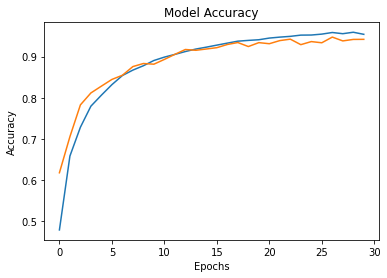

In [26]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()